### Import Library

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset yang diberikan adalah data historis tentang saham Hyundai. Berikut adalah penjelasan untuk setiap kolom dalam dataset:

Date: Kolom ini berisi tanggal transaksi saham. Setiap baris dalam dataset mewakili satu tanggal.
Open: Harga pembukaan saham pada tanggal tertentu. Ini adalah harga saham pertama yang ditawarkan pada hari tersebut.
High: Harga tertinggi saham yang dicapai pada tanggal tertentu. Ini adalah harga tertinggi yang tercatat selama hari perdagangan.
Low: Harga terendah saham yang dicapai pada tanggal tertentu. Ini adalah harga terendah yang tercatat selama hari perdagangan.
Close: Harga penutupan saham pada tanggal tertentu. Ini adalah harga saham terakhir yang ditawarkan pada hari tersebut.
Adj Close: Harga penutupan saham yang disesuaikan. Ini adalah harga penutupan yang disesuaikan untuk memperhitungkan perubahan seperti pembagian saham, dividen, dan aksi korporasi lainnya.
Volume: Volume perdagangan saham pada tanggal tertentu. Ini adalah jumlah saham yang diperdagangkan selama hari tersebut.
Dengan menggunakan dataset ini, Anda dapat menganalisis tren harga saham seiring waktu, mengidentifikasi fluktuasi harga, melihat tingkat likuiditas (berdasarkan volume perdagangan), dan melakukan analisis lainnya terkait pasar saham Hyundai.

### Melakukan Load Dataset

In [26]:
df = pd.read_csv("Hyundai Stocks Monthly.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-31,149000.0,149000.0,131000.0,133000.0,103241.234375,11288332
1,2016-01-31,132000.0,153000.0,126500.0,147500.0,114496.867188,10251020
2,2016-02-29,147500.0,159500.0,143500.0,152500.0,118378.101562,10301411
3,2016-03-31,152500.0,155000.0,142000.0,143500.0,111391.859375,7926098
4,2016-04-30,142000.0,144000.0,131500.0,139500.0,108286.859375,9731425
...,...,...,...,...,...,...,...
95,2023-11-30,183300.0,203500.0,180700.0,203500.0,196332.703125,8808029
96,2023-12-31,203500.0,203500.0,179800.0,194600.0,187746.156250,10684615
97,2024-01-31,193900.0,261000.0,193500.0,250500.0,241677.359375,47239276
98,2024-02-29,255500.0,260000.0,232000.0,233000.0,233000.000000,22909204


### Pemilihan Data Untuk Analisis Lebih Lanjut

Mengambil data pada periode tahun 2022 hingga 2024 bulan maret (terkini)

In [27]:
# Filter data untuk rentang waktu dari tahun 2019 hingga Maret 2024

df['Date'] = pd.to_datetime(df['Date'])
filtered_df = df[(df['Date'] >= '2019-01-01') & (df['Date'] <= '2024-03-31')]
filtered_df

,Date,Open,High,Low,Close,Adj Close,Volume
37,2019-01-31,129500.0,130000.0,118500.0,126500.0,107157.085938,10278056
38,2019-02-28,126500.0,129000.0,117000.0,119500.0,101227.445312,10837859
39,2019-03-31,120000.0,140500.0,117500.0,138500.0,117322.187500,12400505
40,2019-04-30,138500.0,140500.0,125000.0,134500.0,113933.828125,13022972
41,2019-05-31,134000.0,143500.0,132500.0,140000.0,118592.828125,7738160
...,...,...,...,...,...,...,...
95,2023-11-30,183300.0,203500.0,180700.0,203500.0,196332.703125,8808029
96,2023-12-31,203500.0,203500.0,179800.0,194600.0,187746.156250,10684615
97,2024-01-31,193900.0,261000.0,193500.0,250500.0,241677.359375,47239276
98,2024-02-29,255500.0,260000.0,232000.0,233000.0,233000.000000,22909204


In [29]:
#mengecek nilai yang hilang

missing_values = filtered_df.isnull().sum()
print("Jumlah Missing Value Setiap Kolom: ")
(missing_values)

Jumlah Missing Value Setiap Kolom: 


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Analisis Deskriptif

In [30]:
# perhitungan statistik deskriptif

deskriptif = filtered_df.describe()
deskriptif

,Date,Open,High,Low,Close,Adj Close,Volume
count,63,63.000000,63.000000,63.000000,63.000000,63.000000,6.300000e+01
mean,2021-08-30 08:00:00,173123.809524,186434.920635,163366.666667,174477.777778,158455.498388,2.099492e+07
min,2019-01-31 00:00:00,88500.000000,99600.000000,65000.000000,88700.000000,77571.523438,8.523460e+05
25%,2020-05-15 12:00:00,134000.000000,141500.000000,125250.000000,136500.000000,115820.191406,1.155300e+07
50%,2021-08-31 00:00:00,181500.000000,191000.000000,170500.000000,181500.000000,167539.156250,1.458286e+07
75%,2022-12-15 12:00:00,198250.000000,213250.000000,192750.000000,200000.000000,187656.062500,2.290564e+07
max,2024-03-29 00:00:00,255500.000000,289000.000000,232000.000000,250500.000000,241677.359375,9.850560e+07
std,NaN,40685.896400,43714.776267,39672.128024,40696.300238,40879.691448,1.735146e+07


In [31]:
korelasi = filtered_df.corr()
korelasi

,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,0.638638,0.601473,0.644773,0.644095,0.743906,-0.263964
Open,0.638638,1.000000,0.931903,0.973135,0.919164,0.914147,-0.184303
High,0.601473,0.931903,1.000000,0.944341,0.970244,0.952829,0.097793
Low,0.644773,0.973135,0.944341,1.000000,0.960838,0.952707,-0.178670
Close,0.644095,0.919164,0.970244,0.960838,1.000000,0.987486,-0.002276
Adj Close,0.743906,0.914147,0.952829,0.952707,0.987486,1.000000,-0.051509
Volume,-0.263964,-0.184303,0.097793,-0.178670,-0.002276,-0.051509,1.000000


### Analisis Visual

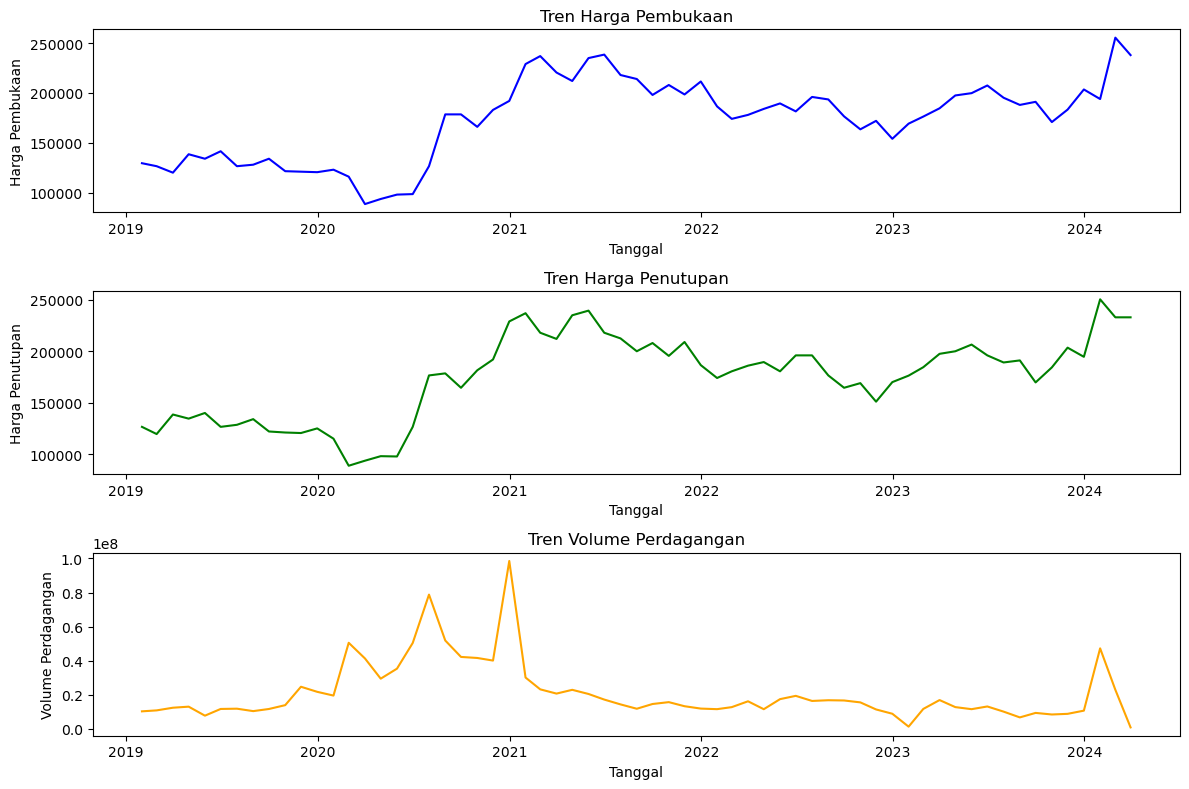

In [32]:
import matplotlib.pyplot as plt

# Plot tren untuk setiap variabel
plt.figure(figsize=(12, 8))

# Harga Pembukaan
plt.subplot(3, 1, 1)
plt.plot(filtered_df['Date'], filtered_df['Open'], color='blue')
plt.title('Tren Harga Pembukaan')
plt.xlabel('Tanggal')
plt.ylabel('Harga Pembukaan')

# Harga Penutupan
plt.subplot(3, 1, 2)
plt.plot(filtered_df['Date'], filtered_df['Close'], color='green')
plt.title('Tren Harga Penutupan')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')

# Volume Perdagangan
plt.subplot(3, 1, 3)
plt.plot(filtered_df['Date'], filtered_df['Volume'], color='orange')
plt.title('Tren Volume Perdagangan')
plt.xlabel('Tanggal')
plt.ylabel('Volume Perdagangan')

plt.tight_layout()
plt.show()

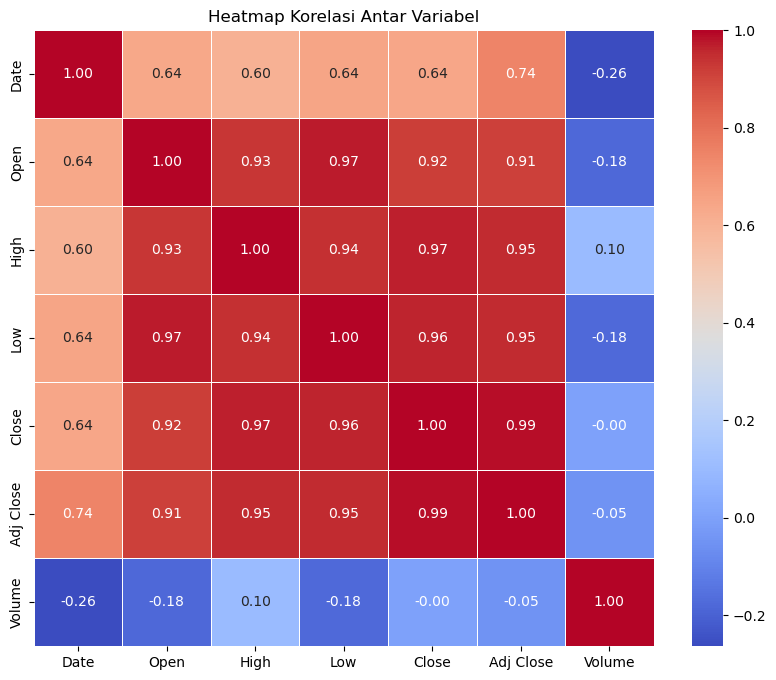

In [33]:
import seaborn as sns

# Heatmap untuk korelasi antar variabel
plt.figure(figsize=(10, 8))
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

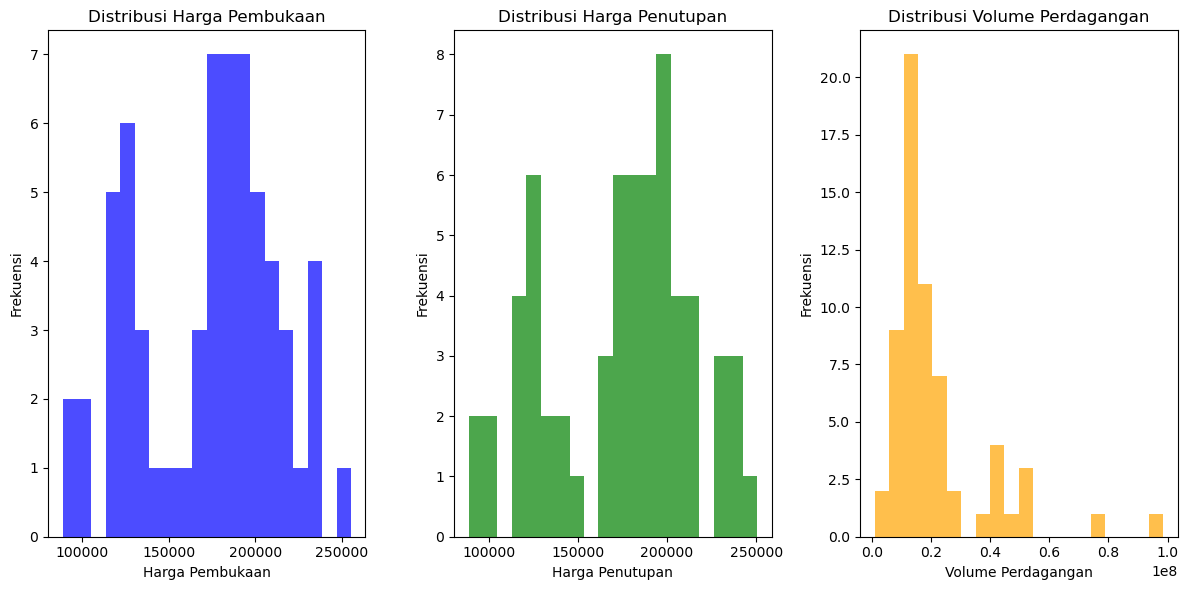

In [34]:
# Histogram untuk distribusi variabel
plt.figure(figsize=(12, 6))

# Harga Pembukaan
plt.subplot(1, 3, 1)
plt.hist(filtered_df['Open'], bins=20, color='blue', alpha=0.7)
plt.title('Distribusi Harga Pembukaan')
plt.xlabel('Harga Pembukaan')
plt.ylabel('Frekuensi')

# Harga Penutupan
plt.subplot(1, 3, 2)
plt.hist(filtered_df['Close'], bins=20, color='green', alpha=0.7)
plt.title('Distribusi Harga Penutupan')
plt.xlabel('Harga Penutupan')
plt.ylabel('Frekuensi')

# Volume Perdagangan
plt.subplot(1, 3, 3)
plt.hist(filtered_df['Volume'], bins=20, color='orange', alpha=0.7)
plt.title('Distribusi Volume Perdagangan')
plt.xlabel('Volume Perdagangan')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

### Analisis Volume Perdagangan Harian Terhadap Harga Saham

Untuk melihat apakah ada hubungan antara volume perdagangan harian dengan harga saham, kita dapat melakukan analisis dengan scatter plot antara volume perdagangan dan harga penutupan. Selanjutnya, kita juga dapat menambahkan garis tren untuk melihat pola umum dari hubungan ini.

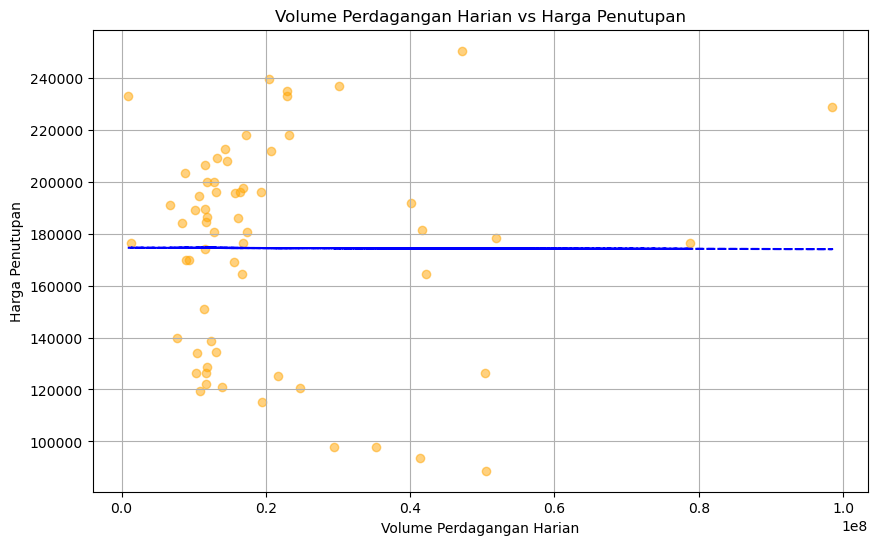

In [36]:
import numpy as np

# Scatter plot volume perdagangan vs harga penutupan
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Volume'], filtered_df['Close'], color='orange', alpha=0.5)
plt.title('Volume Perdagangan Harian vs Harga Penutupan')
plt.xlabel('Volume Perdagangan Harian')
plt.ylabel('Harga Penutupan')

# Menambahkan garis tren
z = np.polyfit(filtered_df['Volume'], filtered_df['Close'], 1)
p = np.poly1d(z)
plt.plot(filtered_df['Volume'], p(filtered_df['Volume']), color='blue', linestyle='--')

plt.grid(True)
plt.show()
